# Energy AI Hackathon 2024: Team Entelligence
Authors:
- Atharva Kalamkar, Computational Engineering
- Mihir Yogesh Bendre, Computational Engineering
- Avya Kalra, Computational Engineering
- Muhammad Taha, Computational Engineering
- Muhammad Akmal, PGE

**The University of Texas at Austin, Austin, Texas USA**

Executive Summary,
Workflow Goal,
Workflow Steps

# 1. Importing Libraries and Dataset

In [356]:
#Importing required packages.
import pandas as pd
import numpy as np
import pickle
import pingouin as pg
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# To get diferent metric scores
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    confusion_matrix,
)

In [357]:
#Importing the data
dataFile ='HackathonData2024.csv'
data = pd.read_csv(dataFile,index_col=0)

# 2. Data Cleaning / Imputation
- Dropping N/A values for response variable
- Impute missing values
- Normalize data

In [358]:
# Drop N/A values in avg pump difference
data.dropna(subset=['Avg Pump Difference'], inplace=True)

In [359]:
# Assign a unique numerical label to each categorical variable using Label Encoder
le = LabelEncoder()

data['Area'] = le.fit_transform(data['Area'])
data['Fluid System'] = le.fit_transform(data['Fluid System'])
data['Development Strategy'] = le.fit_transform(data['Development Strategy'])
data['CODEV_POSITION'] = le.fit_transform(data['CODEV_POSITION'])
data['CODEV_FORMATION_POSITION'] = le.fit_transform(data['CODEV_FORMATION_POSITION'])


In [360]:
# Normalize data
scaler = MinMaxScaler()

# Fit and transform the entire DataFrame
normalized_data = scaler.fit_transform(data)

# Convert the normalized data back to a DataFrame
data = pd.DataFrame(normalized_data, columns=data.columns)

In [361]:
data.describe()

,Avg Pump Difference,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,CODEV_FORMATION_POSITION,...,CODEV_3000_AVG_TVD_DIST,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure
count,333.000000,333.000000,333.000000,333.000000,329.000000,333.000000,333.000000,333.000000,333.000000,333.000000,...,333.000000,333.000000,333.000000,333.000000,331.000000,333.000000,327.000000,327.000000,332.000000,332.000000
mean,0.270520,0.444645,0.555877,0.191191,0.524380,0.298298,0.714715,0.890495,0.360360,0.261261,...,0.162869,0.523199,0.475486,0.157723,0.430015,0.162489,0.566773,0.068608,0.619906,0.340903
std,0.187205,0.266395,0.151257,0.257061,0.257537,0.241884,0.452230,0.253909,0.480827,0.439983,...,0.191080,0.110829,0.105588,0.173221,0.175004,0.149096,0.205880,0.087860,0.209693,0.172433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.127357,0.233333,0.484277,0.000000,0.298799,0.000000,0.000000,0.900080,0.000000,0.000000,...,0.012813,0.510511,0.459184,0.043478,0.283829,0.040082,0.429562,0.029204,0.492576,0.215193
50%,0.231320,0.433333,0.503145,0.000000,0.472973,0.333333,1.000000,0.990989,0.000000,0.000000,...,0.109823,0.510511,0.459184,0.130435,0.419265,0.117163,0.551717,0.049000,0.641925,0.334490
75%,0.361831,0.666667,0.654088,0.333333,0.804805,0.500000,1.000000,0.999990,1.000000,1.000000,...,0.236730,0.533033,0.469388,0.217391,0.559753,0.227133,0.713690,0.074897,0.770585,0.440471
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [362]:
# Impute data using KNNImputer
response = 'Avg Pump Difference'

# Separate the features for imputation
features_for_imputation = data.drop(columns=[response])

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Impute missing values for features
imputed_features = pd.DataFrame(imputer.fit_transform(features_for_imputation), columns=features_for_imputation.columns)

# Combine the imputed features with the response variable
data = pd.concat([imputed_features, data[response]], axis=1)

In [363]:
data.describe()

,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,CODEV_FORMATION_POSITION,PARENT_CODEV_1050_WELL_COUNT,...,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure,Avg Pump Difference
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,...,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.444645,0.555877,0.191191,0.527899,0.298298,0.714715,0.890495,0.360360,0.261261,0.321321,...,0.523199,0.475486,0.157723,0.429853,0.162489,0.568119,0.068064,0.620243,0.341042,0.270520
std,0.266395,0.151257,0.257061,0.258648,0.241884,0.452230,0.253909,0.480827,0.439983,0.203868,...,0.110829,0.105588,0.173221,0.174564,0.149096,0.205221,0.087169,0.209467,0.172192,0.187205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.484277,0.000000,0.301802,0.000000,0.000000,0.900080,0.000000,0.000000,0.200000,...,0.510511,0.459184,0.043478,0.283877,0.040082,0.431721,0.029155,0.493801,0.215475,0.127357
50%,0.433333,0.503145,0.000000,0.487988,0.333333,1.000000,0.990989,0.000000,0.000000,0.300000,...,0.510511,0.459184,0.130435,0.419265,0.117163,0.552746,0.048510,0.642634,0.334837,0.231320
75%,0.666667,0.654088,0.333333,0.809309,0.500000,1.000000,0.999990,1.000000,1.000000,0.400000,...,0.533033,0.469388,0.217391,0.559553,0.227133,0.714874,0.074334,0.769267,0.439885,0.361831
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Data Overview

- Observations
- Sanity checks

In [364]:
# Check how the data looks like
data.head()

,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,CODEV_FORMATION_POSITION,PARENT_CODEV_1050_WELL_COUNT,...,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure,Avg Pump Difference
0,0.000000,0.503145,0.0,0.921922,0.000000,1.0,0.999000,0.0,0.0,0.2,...,0.510511,0.459184,0.000000,0.759727,0.019527,0.842860,0.076784,0.799156,0.255725,0.090496
1,0.000000,0.503145,0.0,0.921922,0.000000,1.0,0.999000,0.0,0.0,0.2,...,0.510511,0.459184,0.000000,0.777598,0.053443,0.841193,0.073942,0.884038,0.494275,0.032628
2,0.033333,0.547170,0.0,0.337838,0.500000,0.0,0.009001,1.0,0.0,0.6,...,0.578078,0.459184,0.434783,0.343463,0.019527,0.541036,0.039102,0.353020,0.363723,0.164602
3,0.066667,0.000000,0.0,0.585586,0.333333,1.0,0.900089,0.0,0.0,0.4,...,0.525526,0.469388,0.043478,0.270124,0.329908,0.799933,0.035019,0.732338,0.387087,0.251020
4,0.100000,0.628931,0.0,0.903904,0.000000,1.0,0.999900,0.0,0.0,0.0,...,0.833333,0.750000,0.130435,0.605109,0.006166,0.648817,0.062230,0.539955,0.295108,0.064255


In [365]:
# Check data size
data.shape

(333, 40)

In [366]:
# Check data statistics summary for numerical values
data.describe()

,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,CODEV_FORMATION_POSITION,PARENT_CODEV_1050_WELL_COUNT,...,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure,Avg Pump Difference
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,...,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.444645,0.555877,0.191191,0.527899,0.298298,0.714715,0.890495,0.360360,0.261261,0.321321,...,0.523199,0.475486,0.157723,0.429853,0.162489,0.568119,0.068064,0.620243,0.341042,0.270520
std,0.266395,0.151257,0.257061,0.258648,0.241884,0.452230,0.253909,0.480827,0.439983,0.203868,...,0.110829,0.105588,0.173221,0.174564,0.149096,0.205221,0.087169,0.209467,0.172192,0.187205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.484277,0.000000,0.301802,0.000000,0.000000,0.900080,0.000000,0.000000,0.200000,...,0.510511,0.459184,0.043478,0.283877,0.040082,0.431721,0.029155,0.493801,0.215475,0.127357
50%,0.433333,0.503145,0.000000,0.487988,0.333333,1.000000,0.990989,0.000000,0.000000,0.300000,...,0.510511,0.459184,0.130435,0.419265,0.117163,0.552746,0.048510,0.642634,0.334837,0.231320
75%,0.666667,0.654088,0.333333,0.809309,0.500000,1.000000,0.999990,1.000000,1.000000,0.400000,...,0.533033,0.469388,0.217391,0.559553,0.227133,0.714874,0.074334,0.769267,0.439885,0.361831
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4. Feature Engineering / Parameter Importance

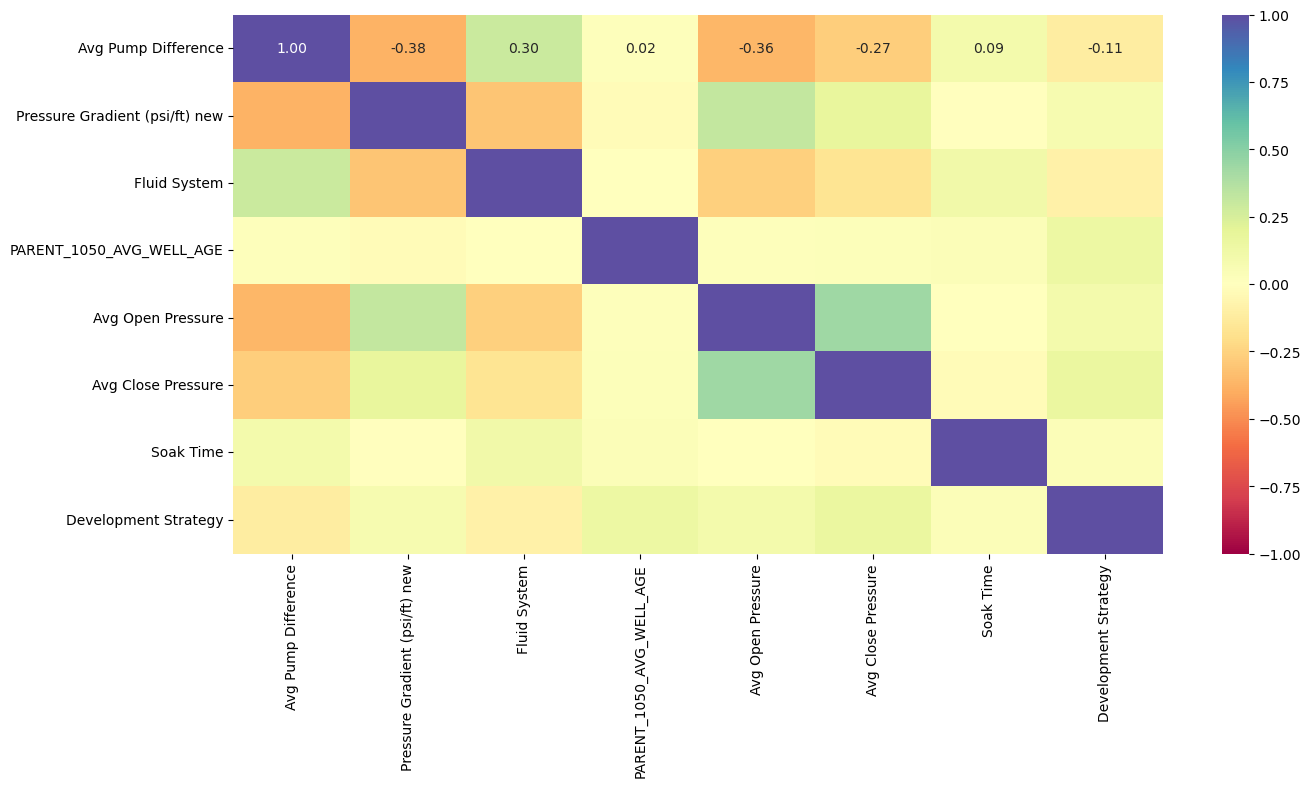

In [367]:
plt.figure(figsize=(15, 7))
selected_columns = ['Avg Pump Difference', 'Pressure Gradient (psi/ft) new', 'Fluid System', 'PARENT_1050_AVG_WELL_AGE', 'Avg Open Pressure', 'Avg Close Pressure', 'Soak Time', 'Development Strategy']
sns.heatmap(data[selected_columns].corr(method='kendall'), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# 5. Data Preprocessing

* Dataset split into two: Training dataset & Prediction dataset
* 80% of them are used fro training the ML model, 20% are used for prediction to check ML performance
* Training data is split into 3 for K-fold cross-validation

# 6. Machine Leaning Models

In [368]:
data.to_csv("imputed_data.csv")